In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import os
import json



In [52]:
# Dynamically determine the root directory (assumes the notebook is in the "Notebooks" directory)
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Path to the dataset relative to the root directory
dataset_path = os.path.join(ROOT_DIR, 'Notebooks', 'preprocessed_data.csv')
metrics_save_path =  os.path.join(ROOT_DIR, 'Notebooks', 'outputs','metrics.json') # Path to save the metrics JSON
graph_save_path = os.path.join(ROOT_DIR, 'static', 'myapp', 'outputs', 'graph.png')  # Path to save the graph


# Load the preprocessed dataset
df = pd.read_csv(dataset_path)

# Display the dataset
print(df.head())

   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      0 -0.850000           -1.319149               -0.293200
1      0 -0.750000           -1.319149                0.834316
2      1 -0.800000           -0.015904               -1.179107
3      1  0.146482           -1.290780               -0.002102
4      1 -0.250000           -1.262411               -0.266355


In [53]:
# Split the data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.34659434732636263


Mean Squared Error (MSE): 0.4249150513156757
R² Score: 0.09322291746161515


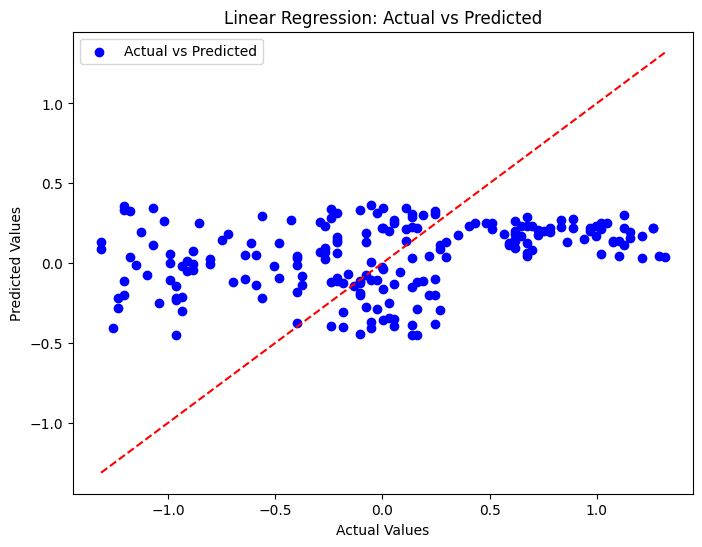

In [54]:
# Predictions and metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Graph saved at: C:\Users\Anushka\mini_project_sem_7\uploadcsv\static\myapp\outputs\graph.png


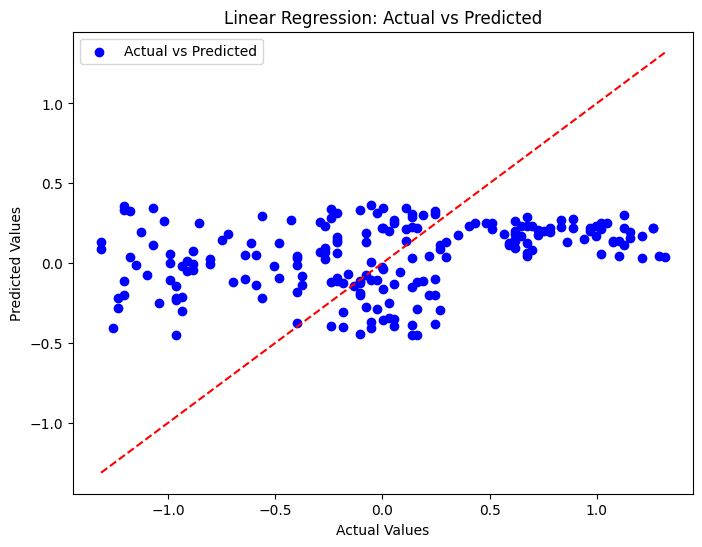

In [55]:
metrics = {
    "mse": mse,
    "r2": r2
}
os.makedirs(os.path.dirname(metrics_save_path), exist_ok=True)
with open(metrics_save_path, 'w') as f:
    json.dump(metrics, f)

# Plot and save the graph
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
os.makedirs(os.path.dirname(graph_save_path), exist_ok=True)
plt.savefig(graph_save_path)
print(f"Graph saved at: {graph_save_path}")

In [56]:

# Save the trained model
saved_models_dir = os.path.join('..', 'savedModels')
os.makedirs(saved_models_dir, exist_ok=True)
model_path = os.path.join(saved_models_dir, 'linear_regression_model.joblib')
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to ..\savedModels\linear_regression_model.joblib
